In [51]:
library(dplyr)
library(factoextra)

df_pilot1_2022 <- readRDS(file = "../../../data/qc2022/preparation_donnees/02_pilot1_2022.rds")

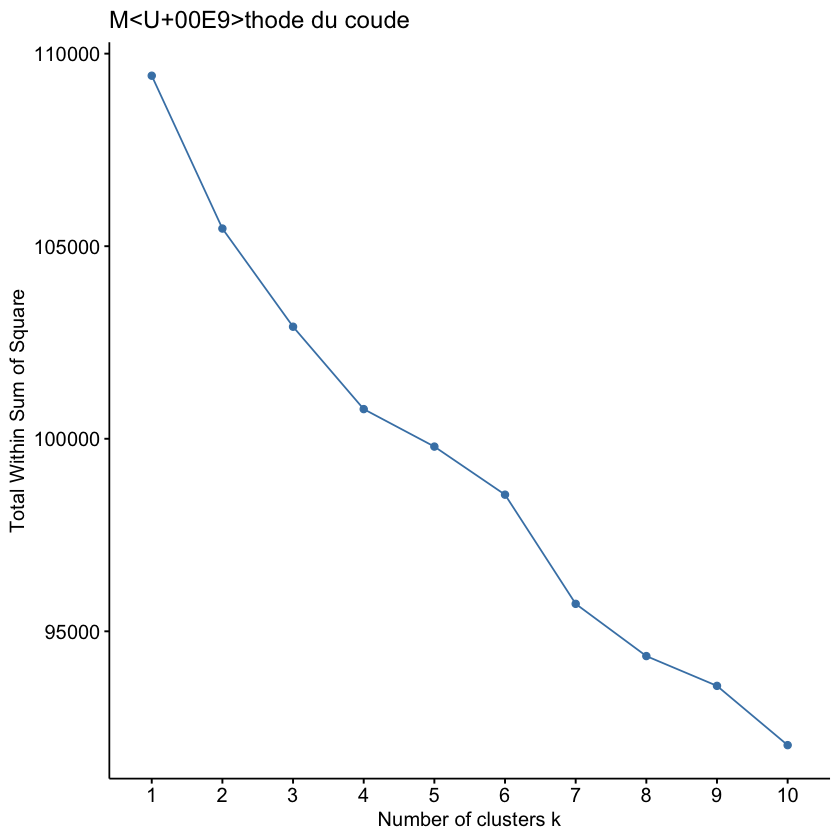

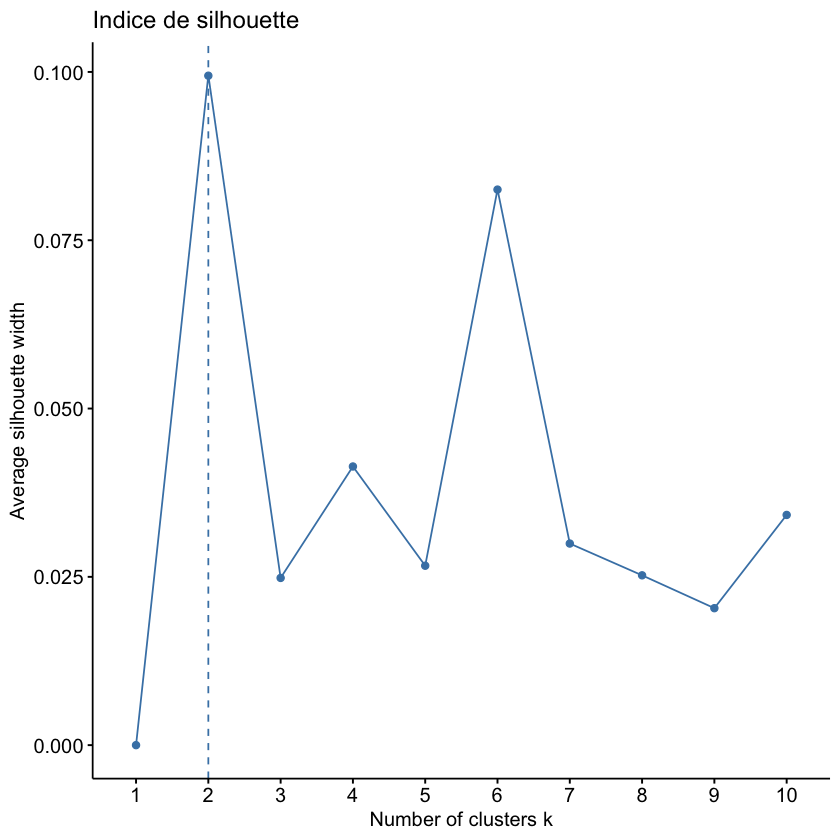

In [40]:
df_pilot1_2022_clust <- df_pilot1_2022 %>% select(-id)
df_scaled <- scale(df_pilot1_2022_clust)

# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  ggtitle("Indice de silhouette")

In [41]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 6

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [52]:
# Ajouter les clusters au dataframe original
df_pilot1_2022$cluster <- as.factor(kmeans_result$cluster)
df_pilot1_2022_clust$cluster <- as.factor(kmeans_result$cluster)

In [42]:
kmeans_result

K-means clustering with 6 clusters of sizes 505, 393, 185, 112, 139, 166

Cluster means:
      act_Gym      act_Walk      act_Run    act_Yoga    act_Other    act_None
1 -0.01166845  0.0102793309 -0.019211596  0.11696300 -0.117357399 -0.01533609
2  0.04262670 -0.0825137260  0.029836600 -0.14279654  0.134418043  0.03918151
3 -0.14707371  0.1676488685 -0.165105944  0.01719353  0.107479400 -0.05602305
4  0.14208829  0.0396464034  0.243872699  0.02185724 -0.132324242 -0.20663445
5  0.08188311  0.0008851594  0.009951992  0.11082556 -0.007023165  0.14306272
6 -0.06594416 -0.0502508600 -0.001062635 -0.14446292  0.014168925  0.03595177
  act_Fishing  act_Hunting act_VisitsMuseumsGaleries
1 -0.12177688 -0.144752544               0.003442976
2  0.20387507  0.214005645              -0.122043507
3 -0.20655422 -0.176890633              -0.001065797
4 -0.02672712  0.008344521               0.219706461
5 -0.18005996 -0.158026096               0.270367424
6  0.28679953  0.257539906              -0.0949

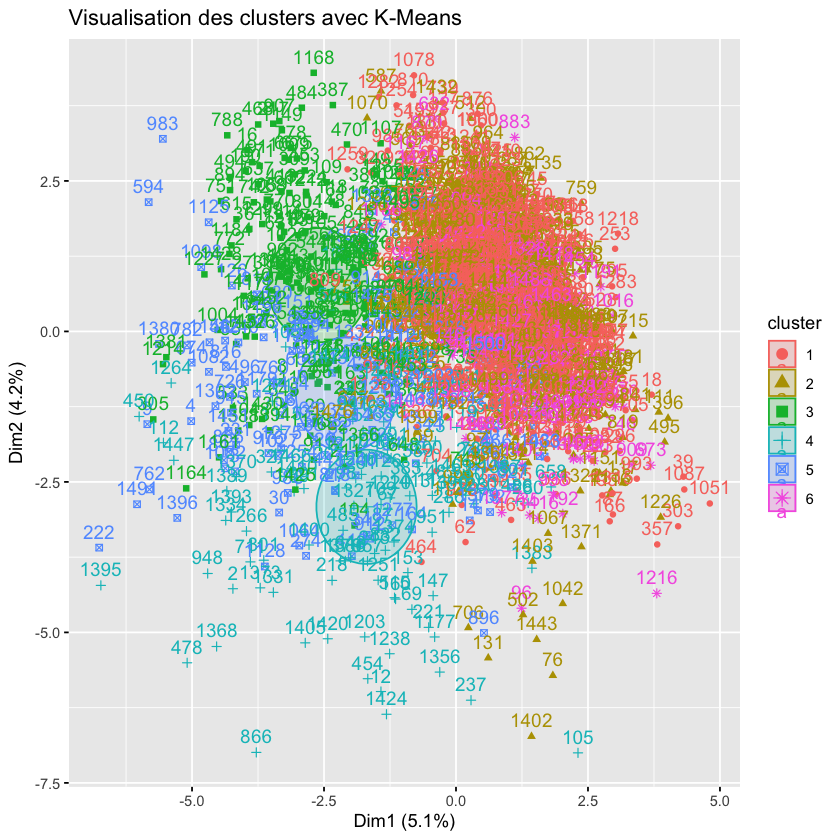

In [43]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [45]:
# Effectuewr les moyennes de chaque groupe pour déterminert s'il y a des tendances marquantes
clusters_means <- aggregate(. ~ cluster, data = df_pilot1_2022_clust, function(x) mean(as.numeric(as.character(x)), na.rm = TRUE))

In [53]:
library(dplyr)
library(tidyr)

# Donner des noms aux clusters
df_pilot1_2022 <- df_pilot1_2022 %>%
  mutate(cluster_name = case_when(
    cluster == 1 ~ "Marie",
    cluster == 2 ~ "Jonathan",
    cluster == 3 ~ "Amélie",
    cluster == 4 ~ "Sam",
    cluster == 5 ~ "Connor",
    cluster == 6 ~ "Dominic"
  ))

# Créer des variables dummy
for (i in 1:6) {
  df_pilot1_2022[[paste0("cluster_", i)]] <- ifelse(df_pilot1_2022$cluster == i, 1, 0)
}


In [55]:
# Sauvegarder les résultats du clustering
saveRDS(kmeans_result, file = "../../../data/qc2022/preparation_donnees/03_pilot1_kmeans.rds")
saveRDS(df_pilot1_2022, file = "../../../data/qc2022/preparation_donnees/03_pilot1_2022.rds")
write.csv(clusters_means, file = "../../../data/qc2022/preparation_donnees/03_pilot1_clusters_desc.csv", row.names = FALSE)

In [54]:
head(df_pilot1_2022)

,id,act_Gym,act_Walk,act_Run,act_Yoga,act_Other,act_None,act_Fishing,act_Hunting,act_VisitsMuseumsGaleries,...,educ,ses_income,cluster,cluster_name,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,0,0,1,0,0.5,0,0.5,...,0.5,0.8571429,2,Jonathan,0,1,0,0,0,0
2,2,0,1,0,0,0,0,0.0,0,0.5,...,1.0,0.0000000,4,Sam,0,0,0,1,0,0
3,3,0,1,1,0,0,0,0.0,0,1.0,...,0.0,0.0000000,5,Connor,0,0,0,0,1,0
4,4,0,1,0,0,0,0,0.0,0,0.5,...,0.5,0.0000000,5,Connor,0,0,0,0,1,0
5,5,1,0,1,0,0,0,0.0,0,0.5,...,0.5,0.8571429,1,Marie,1,0,0,0,0,0
6,6,0,1,0,0,0,0,0.0,0,0.0,...,0.5,0.5714286,1,Marie,1,0,0,0,0,0
